In [122]:
import numpy

import glob
import xarray
import matplotlib.pyplot as mp
import matplotlib.cm as mcm
import datetime

import cmocean
import netCDF4

In [72]:
file_list = numpy.array(sorted(glob.glob('/beegfs/DATA/pritchard/blangenb/ARM_DATA/*c1*.cdf')))

In [83]:
file_datetimes_strings = [i.split('/')[-1].split('.')[2:4] for i in file_list]

file_datetimes = numpy.array([datetime.datetime.strptime(i[0]+i[1], '%Y%m%d%H%M%S') for i in file_datetimes_strings])
file_datetimes_local = file_datetimes-datetime.timedelta(hours=4)

fmaaso_indices = numpy.array([i.month in [2,3,4,8,9,10] for i in file_datetimes_local])
file_list_fmaaso = file_list[fmaaso_indices]
file_datetimes_local_fmaaso = file_datetimes_local[fmaaso_indices]

In [84]:
unique_hours = numpy.unique([t.hour for t in file_datetimes_local_fmaaso])
numpy.unique([t.hour for t in file_datetimes_local_fmaaso])

array([ 1,  2,  7,  8, 10, 11, 13, 14, 19, 20])

group by unique hours above, take means, then plot PBL heights

In [107]:
pbl_height_h_array_list = []
pbl_height_ll_array_list = []
pbl_height_br50_array_list = []
pbl_height_br25_array_list = []

for h in range(unique_hours.__len__()):
    specific_hour = unique_hours[h]
    time_indices = numpy.array([t.hour==specific_hour for t in file_datetimes_local_fmaaso])
    pblh_array_h = numpy.zeros(numpy.sum(time_indices))
    pblh_array_ll = numpy.zeros(numpy.sum(time_indices))
    pblh_array_br50 = numpy.zeros(numpy.sum(time_indices))
    pblh_array_br25 = numpy.zeros(numpy.sum(time_indices))
    
    files_to_open = file_list_fmaaso[time_indices]
    
    for i in range(files_to_open.__len__()):
        ds = xarray.open_dataset(files_to_open[i])
        pblh_array_h[i] = ds['pbl_height_heffter'].values
        pblh_array_ll[i] = ds['pbl_height_liu_liang'].values
        pblh_array_br50[i] = ds['pbl_height_bulk_richardson_pt5'].values
        pblh_array_br25[i] = ds['pbl_height_bulk_richardson_pt25'].values
        ds.close()
    pbl_height_h_array_list.append(pblh_array_h)
    pbl_height_ll_array_list.append(pblh_array_ll)
    pbl_height_br25_array_list.append(pblh_array_br25)
    pbl_height_br50_array_list.append(pblh_array_br50)

In [115]:
pblh_h_means = numpy.array([numpy.nanmean(height_vals) for height_vals in pbl_height_h_array_list])
pblh_ll_means = numpy.array([numpy.nanmean(height_vals) for height_vals in pbl_height_ll_array_list])
pblh_br25_means = numpy.array([numpy.nanmean(height_vals) for height_vals in pbl_height_br25_array_list])
pblh_br50_means = numpy.array([numpy.nanmean(height_vals) for height_vals in pbl_height_br50_array_list])

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


Text(0,1.02,'PBLH at Brazil ARM site (2014-2016)')

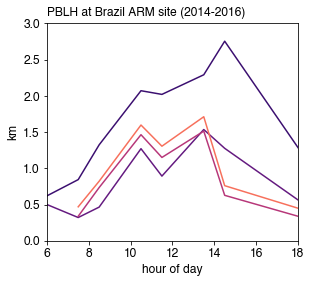

In [153]:
fontsize = 12

fig = mp.figure(figsize=(4.5,4))

ax = fig.add_subplot(111)
ax.plot(unique_hours+0.5, pblh_h_means/1000., label='h', c=mcm.magma(0.2))
ax.plot(unique_hours+0.5, pblh_ll_means/1000., label='Liu and Liang', c=mcm.magma(0.3))
ax.plot(unique_hours+0.5, pblh_br25_means/1000., label='Bulk Ri 0.25', c=mcm.magma(0.5))
ax.plot(unique_hours+0.5, pblh_br50_means/1000., label='Bulk Ri 0.5', c=mcm.magma(0.7))

ax.tick_params(labelsize=fontsize)
ax.set_xlim(6,18)
ax.set_xticks([i for i in range(6,19,2)])
ax.set_ylim(0,3)
ax.set_yticks([i for i in numpy.arange(0,3.1,0.5)])
ax.set_xlabel('hour of day', fontsize=fontsize)
ax.set_ylabel('km', fontsize=fontsize)

ax.text(s='PBLH at Brazil ARM site (2014-2016)', x=0, y=1.02,\
        ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)